In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
star_df = pd.read_csv('star_data.csv')

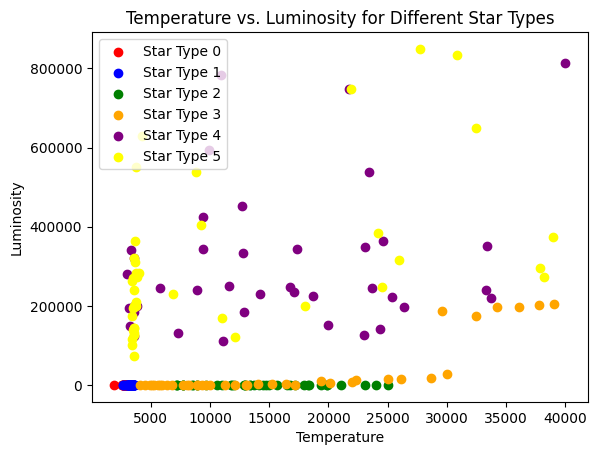

In [3]:
star_type_colors = {
    0: 'red',   # Star Type 0
    1: 'blue',  # Star Type 1
    2: 'green', # Star Type 2
    3: 'orange', # Star Type 3
    4: 'purple', # Star Type 4
    5: 'yellow' # Star Type 4
}

for star_type in star_df['Star type'].unique():
    star_type_data = star_df[star_df['Star type'] == star_type]
    plt.scatter(star_type_data['Temperature (K)'], star_type_data['Luminosity(L/Lo)'],
                color=star_type_colors[star_type], label=f'Star Type {star_type}')

plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.title('Temperature vs. Luminosity for Different Star Types')

plt.legend(loc = 'upper left')

plt.show()


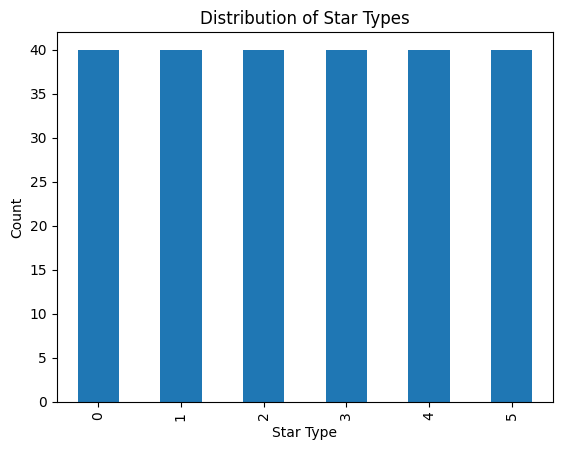

In [4]:
star_df['Star type'].value_counts().plot(kind='bar')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.title('Distribution of Star Types')
plt.show()

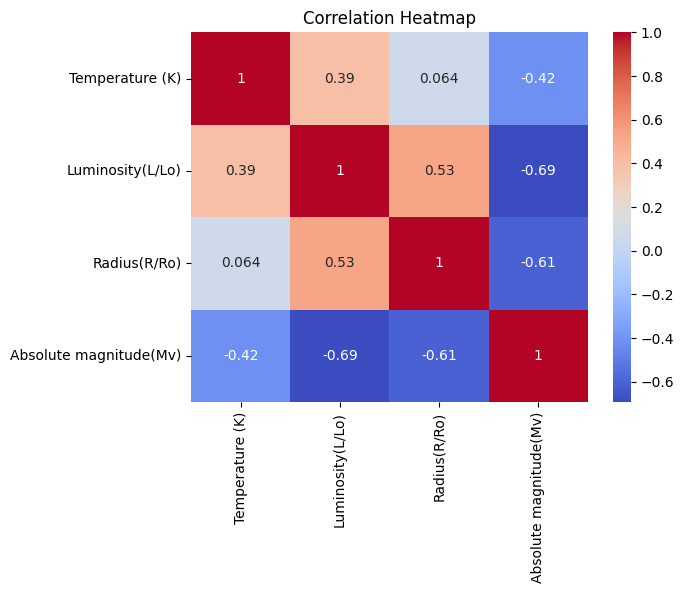

In [5]:
corr_matrix = star_df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
label_encoder = LabelEncoder()
star_df['color_encoded'] = label_encoder.fit_transform(star_df['Star color'])
star_df['spectral_class_encoded'] = label_encoder.fit_transform(star_df['Spectral Class'])

scaler = StandardScaler()
numerical_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
star_df[numerical_features] = scaler.fit_transform(star_df[numerical_features])

X = star_df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'color_encoded', 'spectral_class_encoded']]
y = star_df['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [9]:
X_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),color_encoded,spectral_class_encoded
139,-0.729762,-0.598624,-0.459043,0.946440,10,5
60,-0.750743,-0.598624,-0.459429,1.127211,10,5
204,0.822715,-0.598624,-0.459515,0.650547,0,1
186,-0.789873,-0.598624,-0.459309,1.243285,10,5
207,1.321220,-0.598624,-0.459519,0.551599,0,1


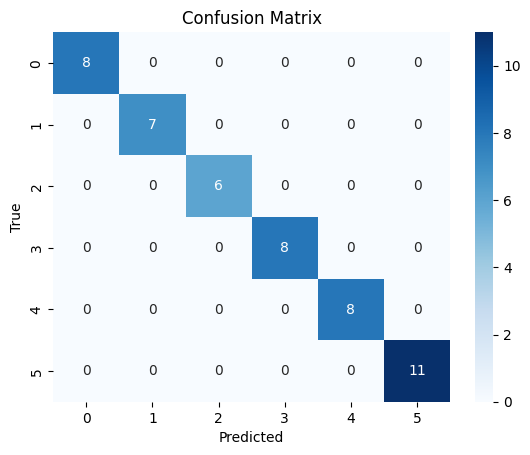

In [10]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

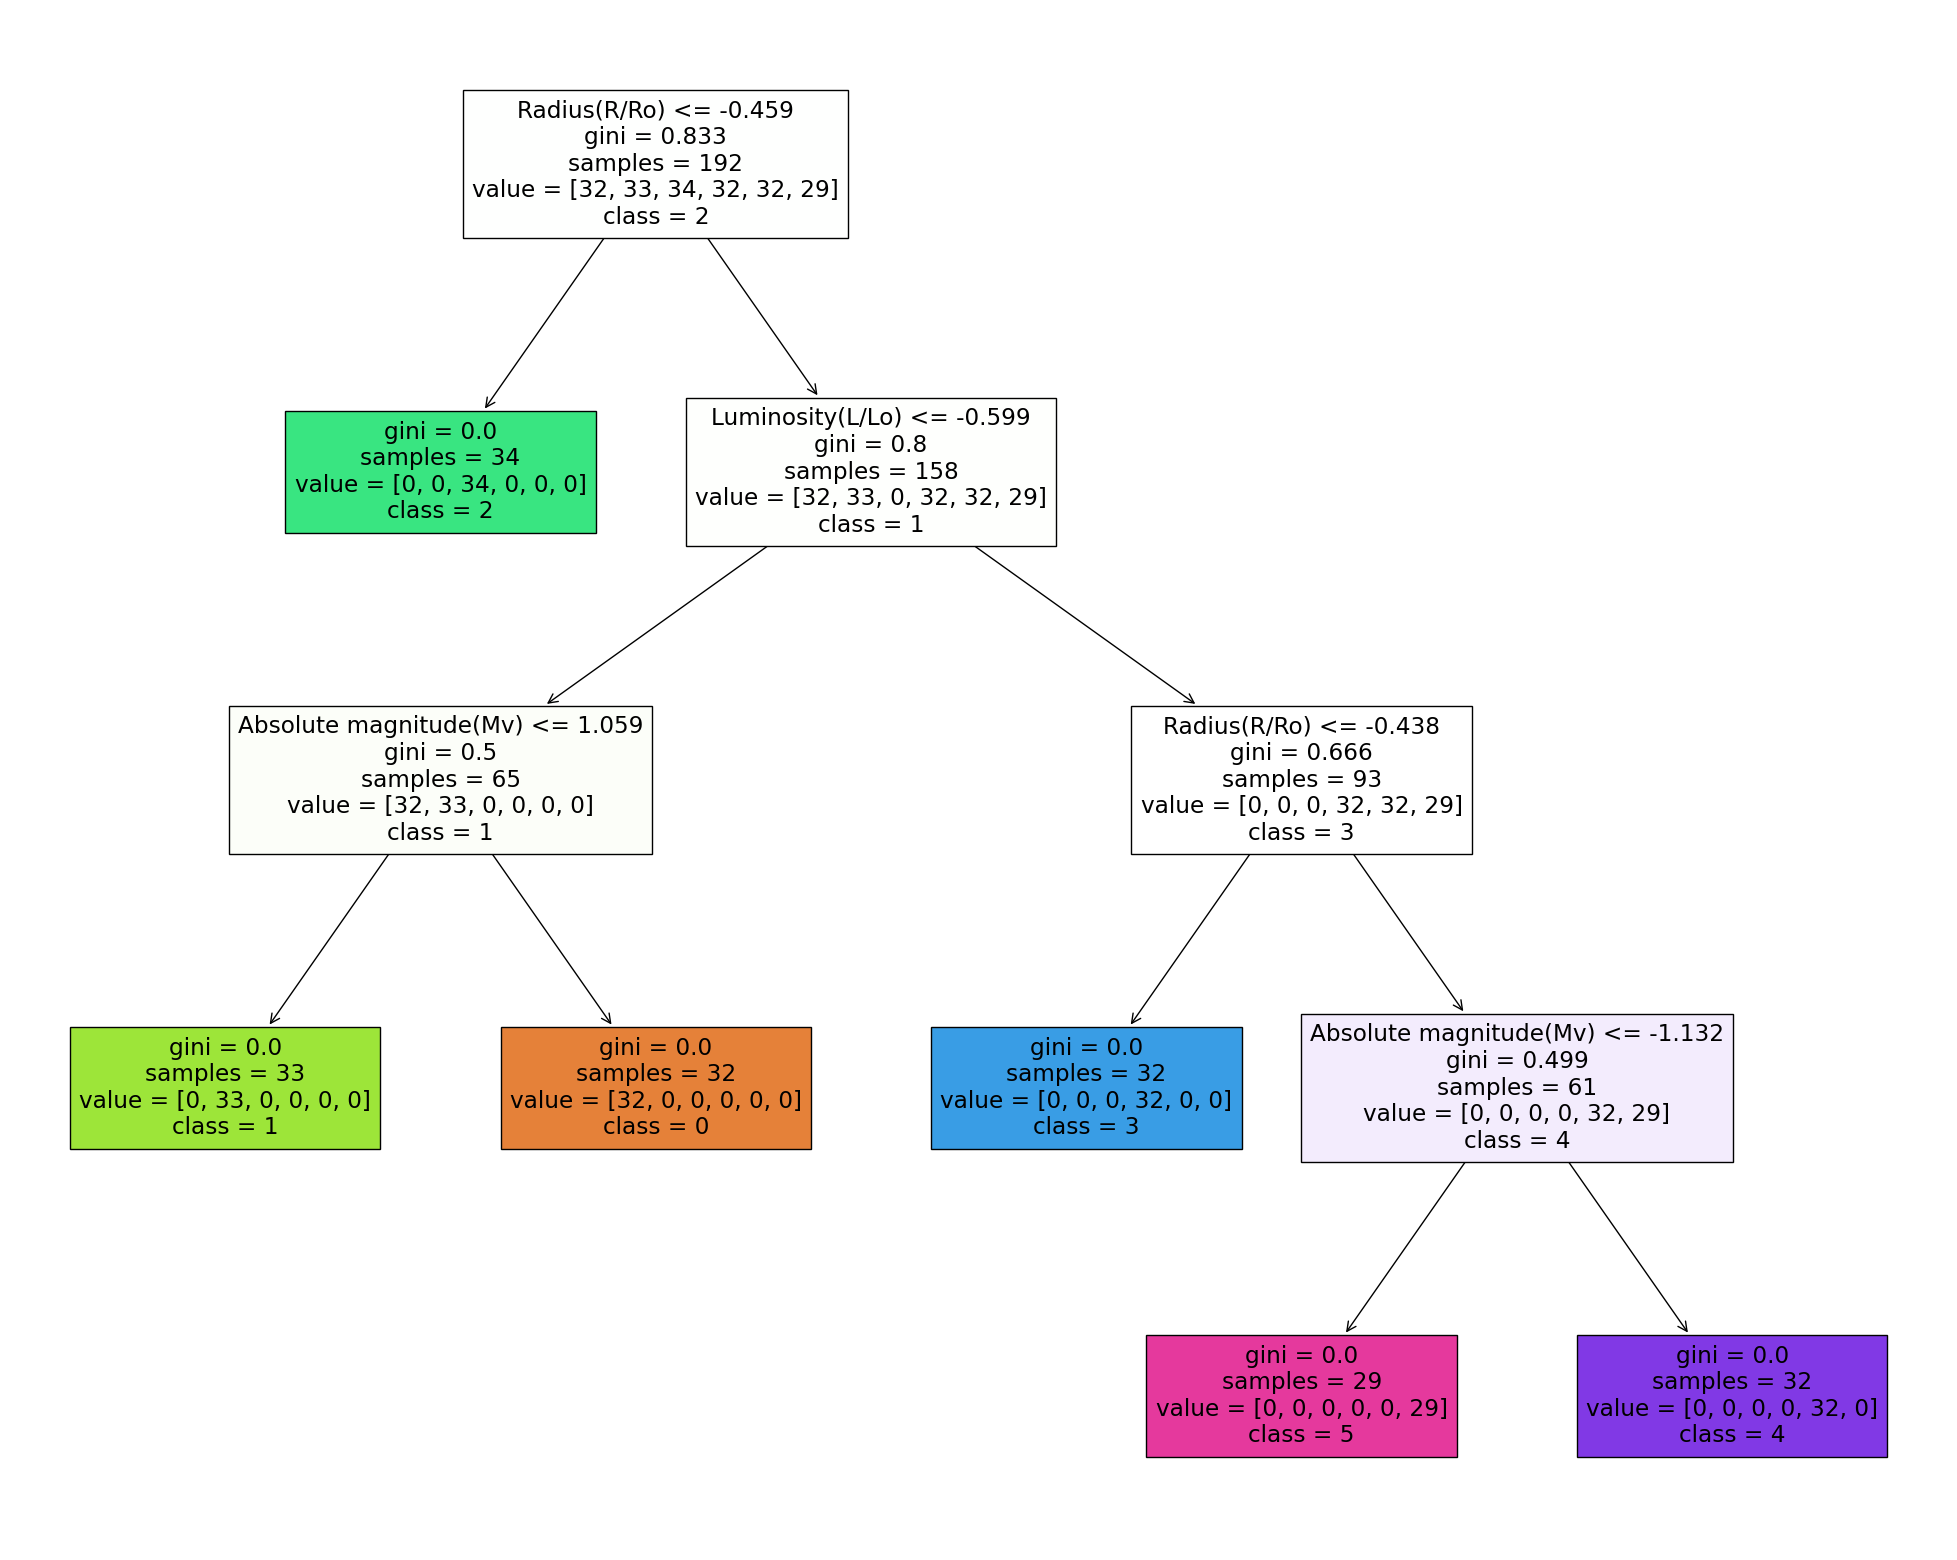

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)','color_encoded', 'spectral_class_encoded'],  
                   class_names=['0','1','2','3','4','5'],
                   filled=True)